# ***Module 1***

### ***Steps in EDA***

In [1]:
# Load dataset
import pandas as pd

file_path = 'vgchartz-2024.csv'
data = pd.read_csv(file_path)

# View first 5 rows
print("First 5 rows of the dataset:")
print(data.head())

# Basic information about the dataset
print("\nDataset Information:")
data.info()

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Basic statistics
print("\nBasic Statistics for numerical columns:")
print(data.describe())

# Unique values in each column
print("\nUnique values in each column:")
print(data.nunique())


First 5 rows of the dataset:
                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09  

### ***Data Types***

***Numerical Data: Discrete vs Continuous***

In [2]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Discrete and continuous separation
discrete_columns = [col for col in numerical_columns if data[col].nunique() < 20]
continuous_columns = [col for col in numerical_columns if col not in discrete_columns]

print("\nNumerical columns:", numerical_columns)
print("Discrete columns:", discrete_columns)
print("Continuous columns:", continuous_columns)



Numerical columns: ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
Discrete columns: []
Continuous columns: ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']


***Categorical Data***

In [3]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:", categorical_columns)



Categorical columns: ['img', 'title', 'console', 'genre', 'publisher', 'developer', 'release_date', 'last_update']


### ***Measurement Scales***

In [4]:
# Classifying columns based on scales
scales = {
    "Nominal": ['title', 'console', 'genre', 'publisher', 'developer'],
    "Ordinal": ['critic_score'],  # Assuming critic_score could be ordinal
    "Interval": [],
    "Ratio": ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
}

print("\nMeasurement Scales:")
for scale, columns in scales.items():
    print(f"{scale}: {columns}")



Measurement Scales:
Nominal: ['title', 'console', 'genre', 'publisher', 'developer']
Ordinal: ['critic_score']
Interval: []
Ratio: ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']


### ***Software Tools for EDA***

***Visualizing Numerical Data***

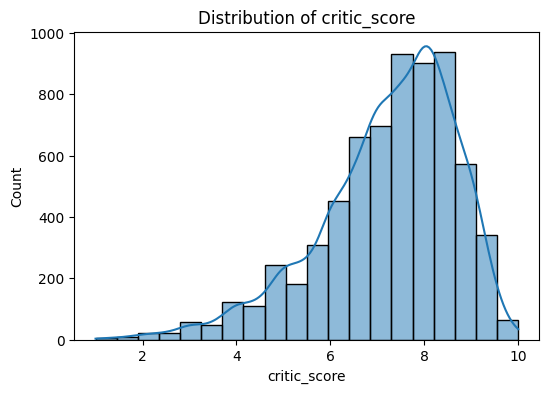

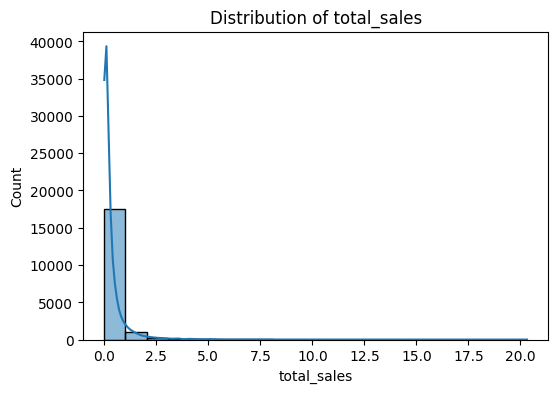

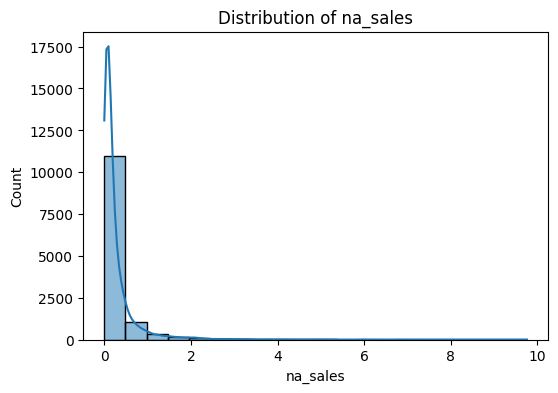

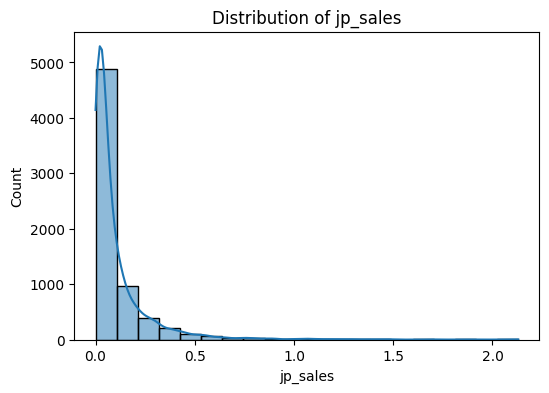

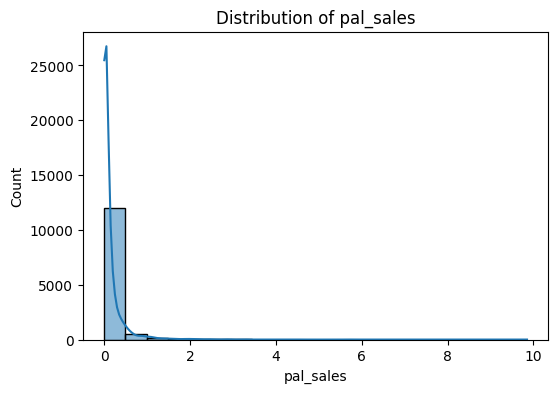

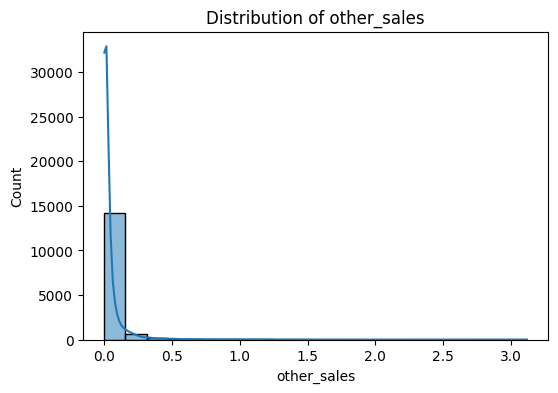

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot numerical data distributions
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col].dropna(), kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()


### ***Visualizing Categorical Data***

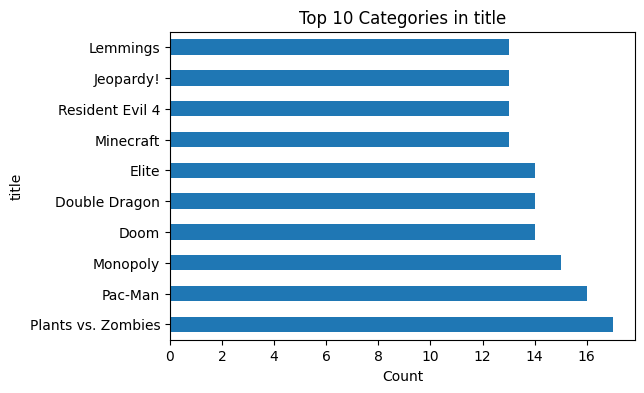

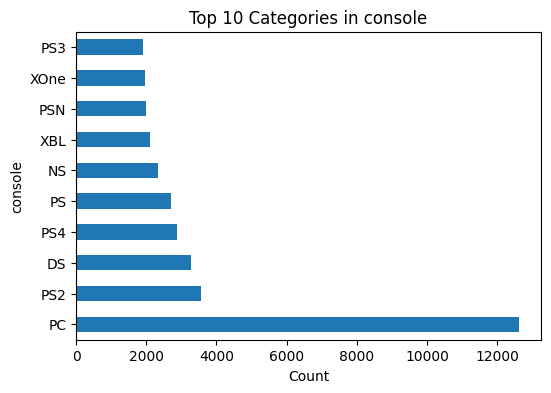

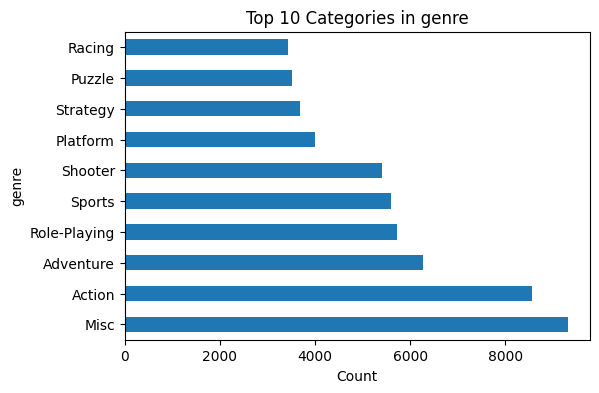

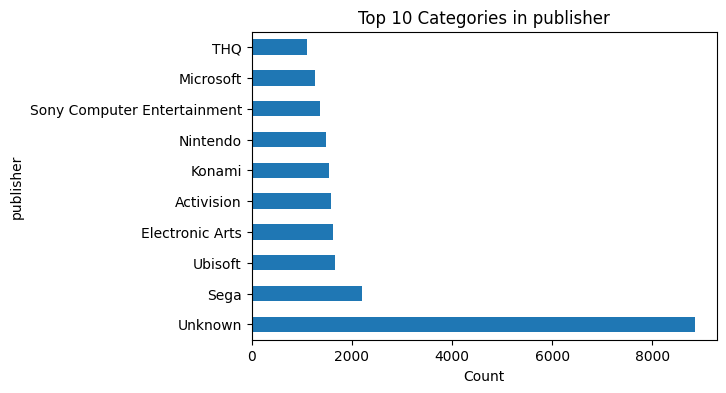

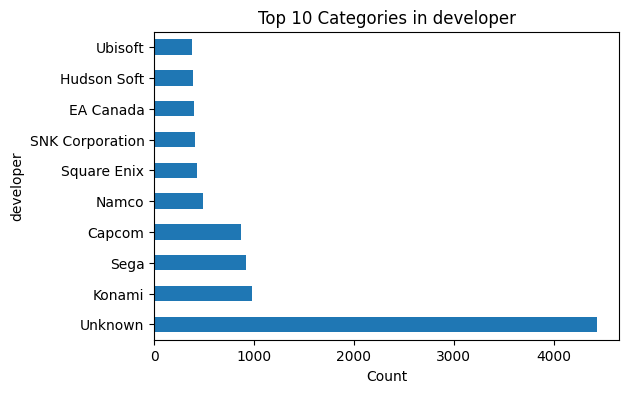

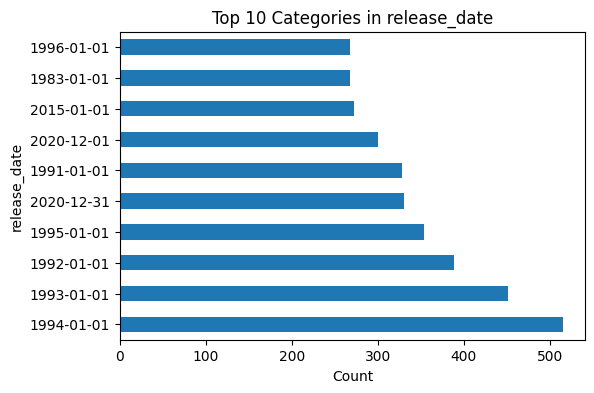

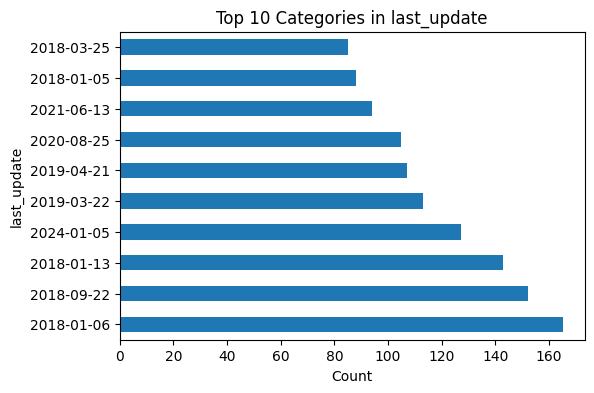

In [8]:
# Plot the top 10 categories for each categorical column
for col in categorical_columns:
  if col != 'img':  # Skip the 'img' column
    plt.figure(figsize=(6, 4))
    data[col].value_counts().head(10).plot(kind='barh')
    plt.title(f"Top 10 Categories in {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()


***Correlation Matrix***

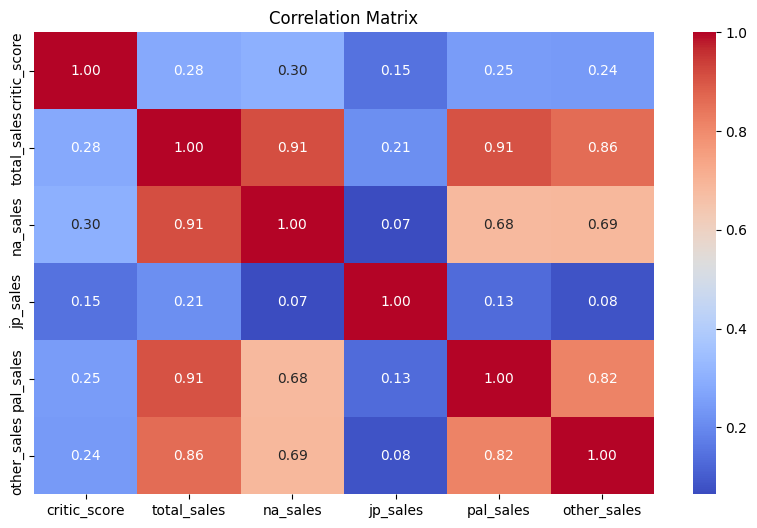

In [9]:
# Heatmap for numerical data correlation
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


***Pairplot for Numerical Data***

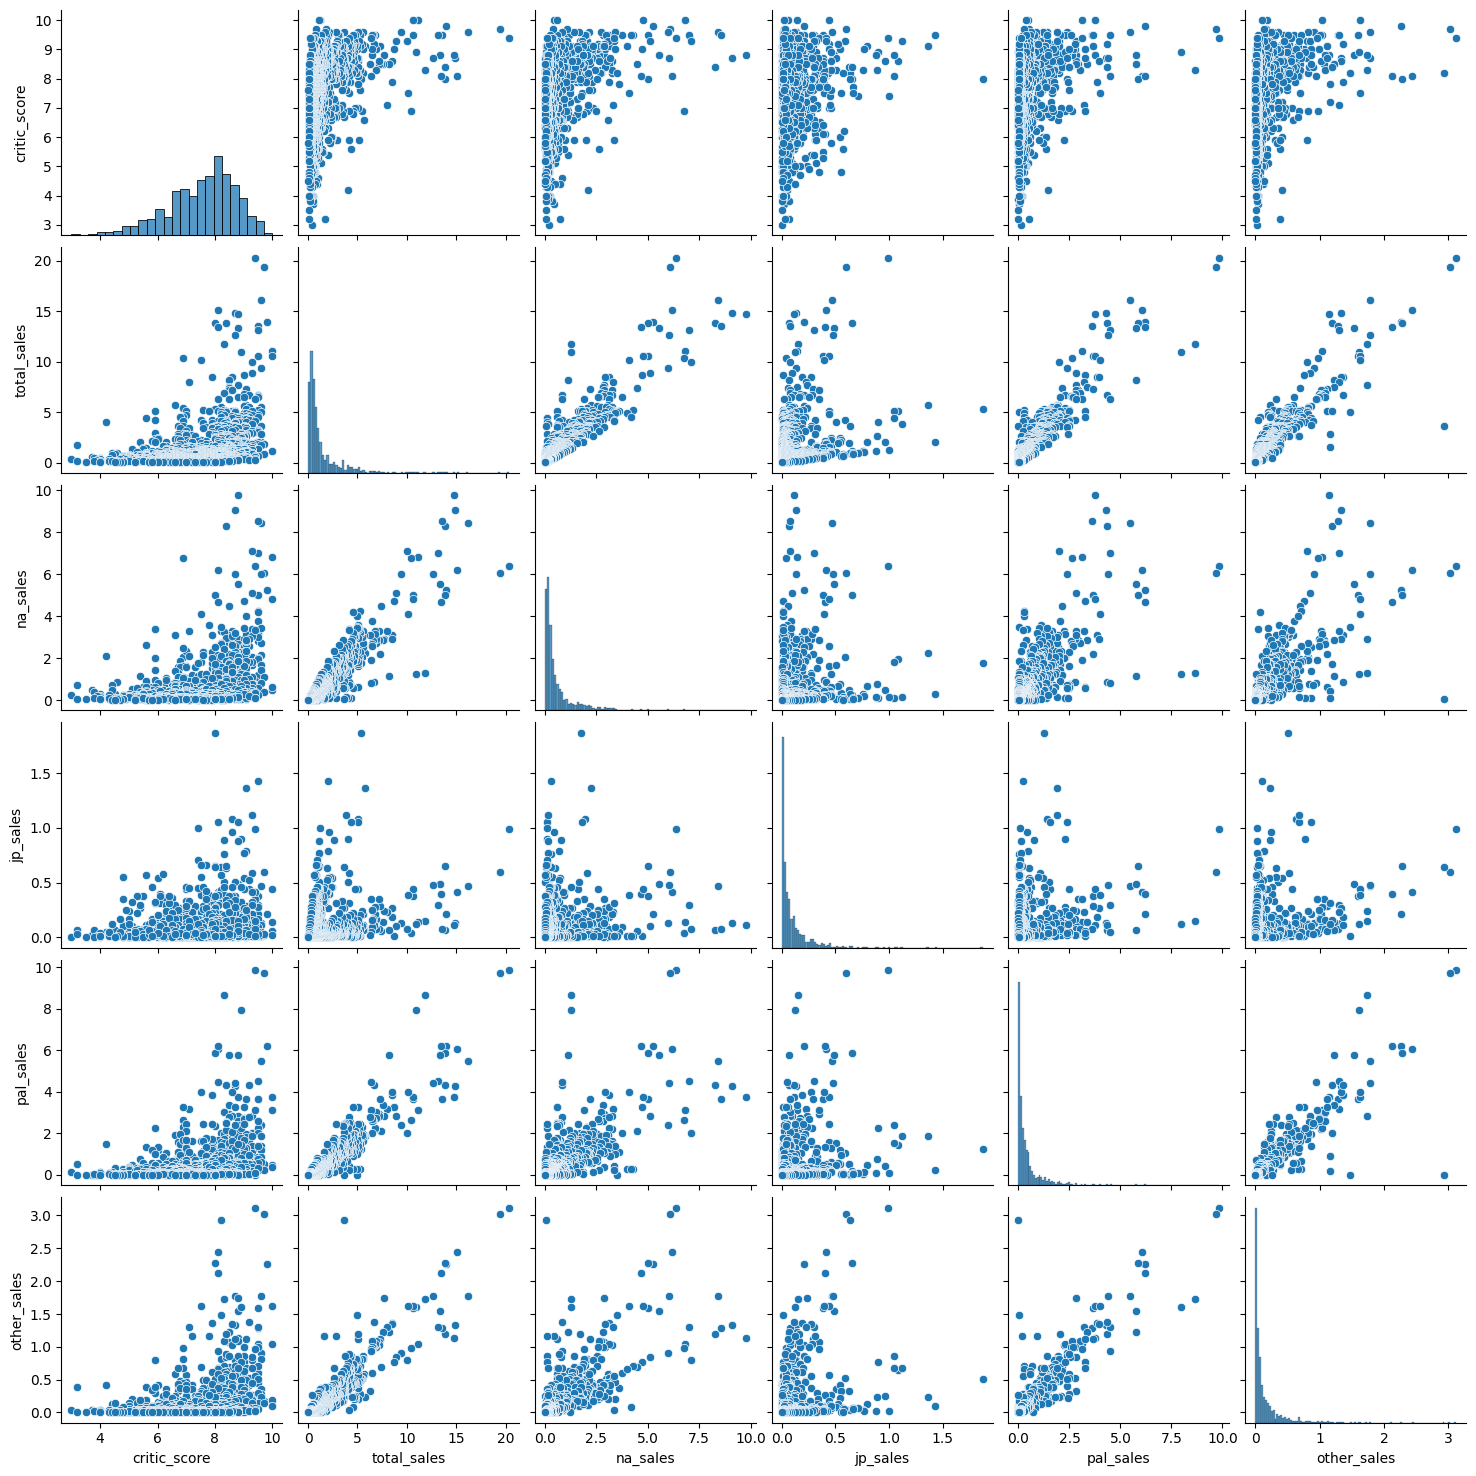

In [10]:
# Pairplot for numerical columns
sns.pairplot(data[numerical_columns].dropna())
plt.show()


# ***Module 2***

### ***Data Deduplication***

In [11]:
# Check for duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())

# Remove duplicate rows
data_deduplicated = data.drop_duplicates()
print("\nData shape after deduplication:", data_deduplicated.shape)



Number of duplicate rows: 0

Data shape after deduplication: (64016, 14)


### ***Replacing Values***

In [12]:
# Replacing a specific value in a column (example: replacing invalid critic scores)
data['critic_score'] = data['critic_score'].replace(-1, None)  # Example: Replace -1 with None

# Replace missing values with a placeholder (e.g., 'Unknown' for categorical)
data['publisher'] = data['publisher'].fillna('Unknown')
print("\nUpdated values in 'publisher' column:")
print(data['publisher'].value_counts())



Updated values in 'publisher' column:
publisher
Unknown               8842
Sega                  2207
Ubisoft               1663
Electronic Arts       1619
Activision            1582
                      ... 
Cancer Research UK       1
XperimentalZ Games       1
Nano Games               1
Cooking Mama Ltd.        1
PLAYDIUS                 1
Name: count, Length: 3383, dtype: int64


### ***Discretization and Binning***

***Binning Numerical Data***

In [13]:
# Binning 'critic_score' into categories (example: Low, Medium, High)
bins = [0, 5, 7, 10]
labels = ['Low', 'Medium', 'High']
data['critic_score_binned'] = pd.cut(data['critic_score'], bins=bins, labels=labels)

print("\nBinned critic_score:")
print(data[['critic_score', 'critic_score_binned']].head())



Binned critic_score:
   critic_score critic_score_binned
0           9.4                High
1           9.7                High
2           9.6                High
3           NaN                 NaN
4           8.1                High


***Binning Total Sales into Percentiles***

In [14]:
# Binning total_sales into quartiles
data['total_sales_binned'] = pd.qcut(data['total_sales'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

print("\nBinned total_sales (quartiles):")
print(data[['total_sales', 'total_sales_binned']].head())



Binned total_sales (quartiles):
   total_sales total_sales_binned
0        20.32          Very High
1        19.39          Very High
2        16.15          Very High
3        15.86          Very High
4        15.09          Very High


### ***Introduction to Missing Data***

In [15]:
# Count missing values in each column
missing_data = data.isnull().sum()
print("\nMissing data in each column:")
print(missing_data)

# Percentage of missing values
missing_percentage = (missing_data / len(data)) * 100
print("\nPercentage of missing data:")
print(missing_percentage)



Missing data in each column:
img                        0
title                      0
console                    0
genre                      0
publisher                  0
developer                 17
critic_score           57338
total_sales            45094
na_sales               51379
jp_sales               57290
pal_sales              51192
other_sales            48888
release_date            7051
last_update            46137
critic_score_binned    57338
total_sales_binned     45094
dtype: int64

Percentage of missing data:
img                     0.000000
title                   0.000000
console                 0.000000
genre                   0.000000
publisher               0.000000
developer               0.026556
critic_score           89.568233
total_sales            70.441765
na_sales               80.259623
jp_sales               89.493252
pal_sales              79.967508
other_sales            76.368408
release_date           11.014434
last_update            72.071045
cr

### ***Handling Missing Data***

***a) Replace Missing Values with Mean (Numerical Data)***

In [16]:
# Impute missing values in 'critic_score' with mean
mean_value = data['critic_score'].mean()
data['critic_score'] = data['critic_score'].fillna(mean_value)

print("\nUpdated 'critic_score' after filling missing values with mean:")
print(data['critic_score'].head())



Updated 'critic_score' after filling missing values with mean:
0    9.40000
1    9.70000
2    9.60000
3    7.22044
4    8.10000
Name: critic_score, dtype: float64


***b) Replace Missing Values with Mode (Categorical Data)***

In [17]:
# Impute missing values in 'genre' with mode
mode_value = data['genre'].mode()[0]
data['genre'] = data['genre'].fillna(mode_value)

print("\nUpdated 'genre' after filling missing values with mode:")
print(data['genre'].value_counts())



Updated 'genre' after filling missing values with mode:
genre
Misc                9304
Action              8557
Adventure           6260
Role-Playing        5721
Sports              5586
Shooter             5410
Platform            4001
Strategy            3685
Puzzle              3521
Racing              3425
Simulation          3158
Fighting            2367
Action-Adventure    1877
Visual Novel         493
Music                297
Party                151
MMO                  115
Education             35
Board Game            33
Sandbox               20
Name: count, dtype: int64


***Maximum Likelihood Estimation (MLE)***

In [19]:
# Note: Install fancyimpute with pip install fancyimpute if not installed
# !pip3 install fancyimpute
from fancyimpute import IterativeImputer
import numpy as np

# Prepare data for MLE
numerical_data = data.select_dtypes(include=['float64', 'int64'])
numerical_data_imputed = IterativeImputer().fit_transform(numerical_data)

# Replace numerical columns with imputed values
numerical_data_imputed_df = pd.DataFrame(numerical_data_imputed, columns=numerical_data.columns)
data.update(numerical_data_imputed_df)

print("\nData after applying Maximum Likelihood Estimation (IterativeImputer):")
print(data.head())



Data after applying Maximum Likelihood Estimation (IterativeImputer):
                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North       9.40000        20.32   
1     PS4   Action  Rockstar Games  Rockstar North       9.70000        19.39   
2     PS2   Action  Rockstar Games  Rockstar North       9.60000        16.15   
3    X360   Action  Rockstar Games  Rockstar North       7.22044        15.86   
4     PS4  Shooter      Activision   

# ***Module 3***

### ***Types of Analysis***

***Univariate Analysis***

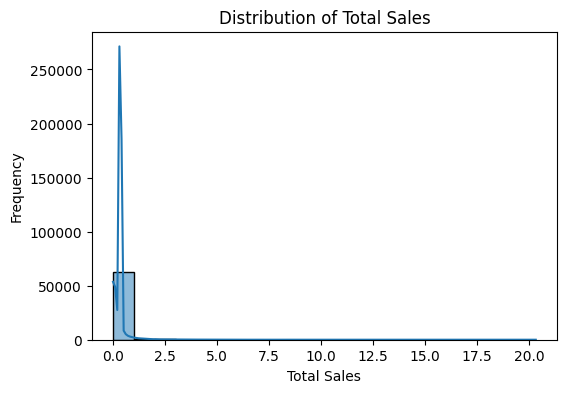

Summary statistics for Total Sales:
count    64016.000000
mean         0.348912
std          0.438995
min          0.000000
25%          0.348912
50%          0.348912
75%          0.348912
max         20.320000
Name: total_sales, dtype: float64


In [20]:
# Example: Distribution of 'total_sales'
plt.figure(figsize=(6, 4))
sns.histplot(data['total_sales'], kde=True, bins=20)
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()

# Summary statistics for 'total_sales'
print("Summary statistics for Total Sales:")
print(data['total_sales'].describe())


***Bivariate Analysis***

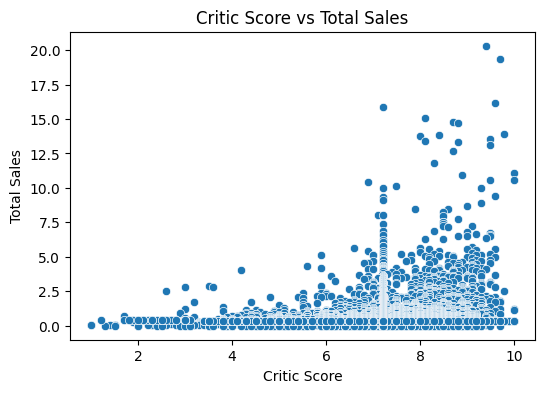

Correlation between Critic Score and Total Sales: 0.16016695263150876


In [21]:
# Example: Scatter plot between 'critic_score' and 'total_sales'
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['critic_score'], y=data['total_sales'])
plt.title("Critic Score vs Total Sales")
plt.xlabel("Critic Score")
plt.ylabel("Total Sales")
plt.show()

# Correlation coefficient
correlation = data['critic_score'].corr(data['total_sales'])
print(f"Correlation between Critic Score and Total Sales: {correlation}")

***Multivariate Analysis***

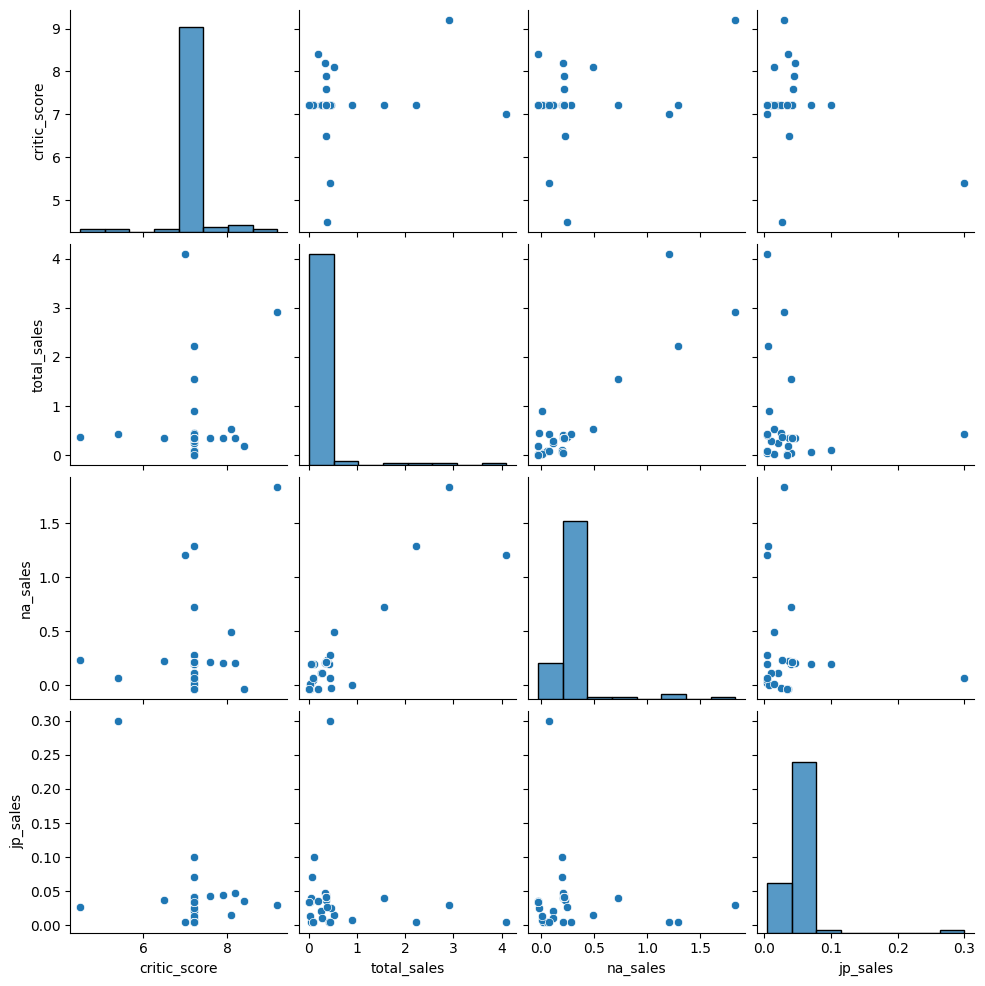

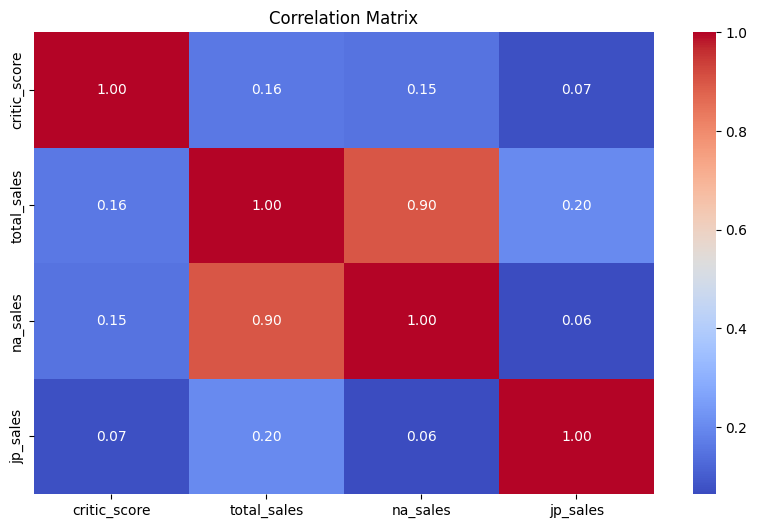

In [23]:
# Example: Pairplot for numerical columns
sampled_data = data[['critic_score', 'total_sales', 'na_sales', 'jp_sales']].dropna().sample(n=100, random_state=42)

sns.pairplot(sampled_data)
plt.show()


# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data[['critic_score', 'total_sales', 'na_sales', 'jp_sales']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### ***Time Series Analysis (TSA)***

***Fundamentals of TSA***

In [25]:
# Convert 'release_date' to datetime, letting pandas infer the format
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Check for any invalid dates
invalid_dates = data[data['release_date'].isna()]
if not invalid_dates.empty:
    print("Invalid dates detected:")
    print(invalid_dates)

# Set 'release_date' as the index if there are no issues
data.set_index('release_date', inplace=True)

print("Data with time-based indexing:")
print(data.head(2))


Invalid dates detected:
                                                     img  \
595          /games/boxart/full_6721404JapanFrontccc.jpg   
4016         /games/boxart/full_tera_476AmericaFront.jpg   
4662   /games/boxart/full_dragon-ball-z-budokai-tenka...   
4846         /games/boxart/full_9253015JapanFrontccc.jpg   
6075   /games/boxart/full_jonah-lomu-rugby-challenge_...   
...                                                  ...   
63982      /games/boxart/full_6855581AmericaFrontccc.jpg   
63983      /games/boxart/full_3646233AmericaFrontccc.jpg   
63984      /games/boxart/full_5400641AmericaFrontccc.jpg   
64003      /games/boxart/full_8639221AmericaFrontccc.jpg   
64015                          /games/boxart/default.jpg   

                                               title console         genre  \
595                  Gran Turismo Concept 2001 Tokyo     PS2        Racing   
4016                                            TERA      PC  Role-Playing   
4662   Dragon Ball Z:

***Characteristics of TSA***

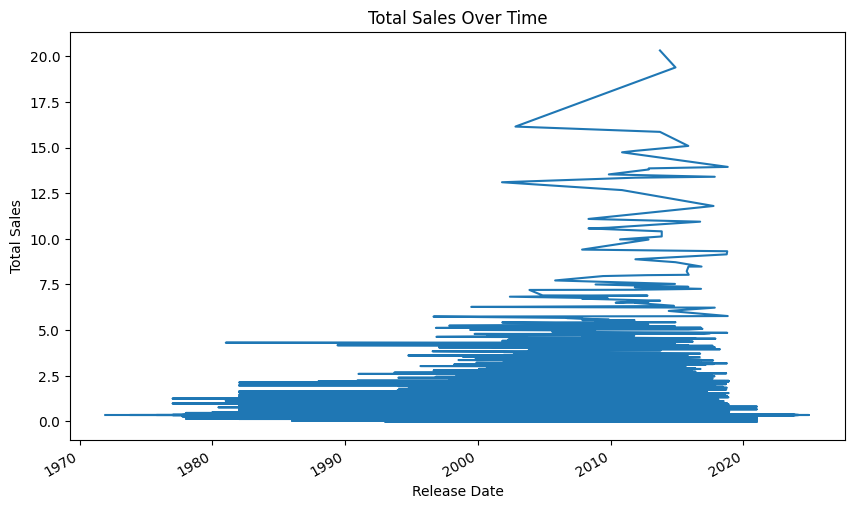

In [26]:
# Plot total sales over time
plt.figure(figsize=(10, 6))
data['total_sales'].plot()
plt.title("Total Sales Over Time")
plt.xlabel("Release Date")
plt.ylabel("Total Sales")
plt.show()


***Visualizing Time Series***

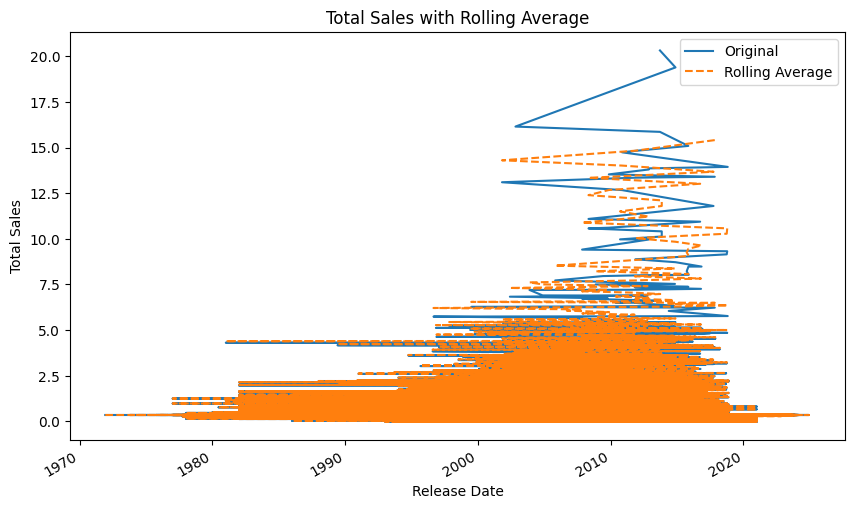

In [27]:
# Plot a rolling average for 'total_sales' to observe trends
data['total_sales_rolling'] = data['total_sales'].rolling(window=12).mean()

plt.figure(figsize=(10, 6))
data['total_sales'].plot(label='Original')
data['total_sales_rolling'].plot(label='Rolling Average', linestyle='--')
plt.title("Total Sales with Rolling Average")
plt.xlabel("Release Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

***Grouping Time Series Data***

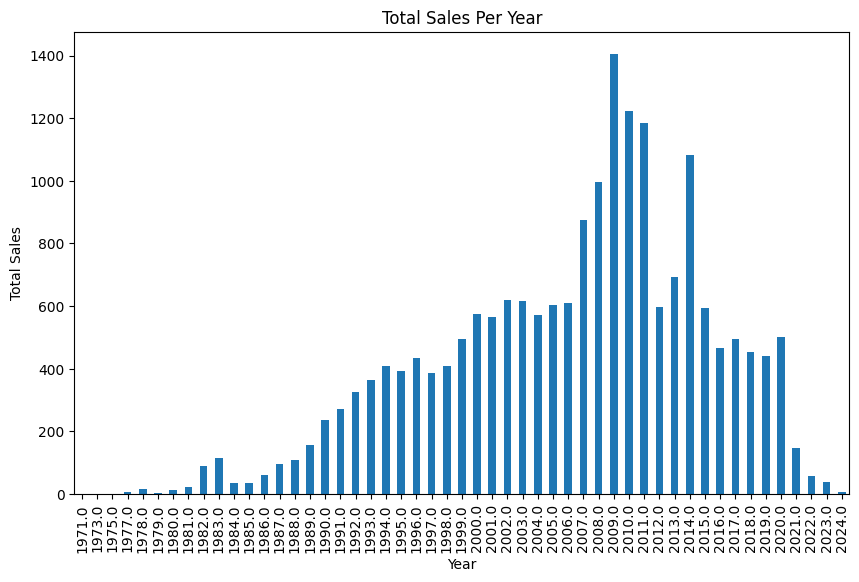

In [28]:
# Group by year and calculate total sales
data['year'] = data.index.year
yearly_sales = data.groupby('year')['total_sales'].sum()

plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar')
plt.title("Total Sales Per Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

***Resampling Time Series Data***

<ipython-input-29-9319205ca970>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['total_sales'].resample('M').sum()


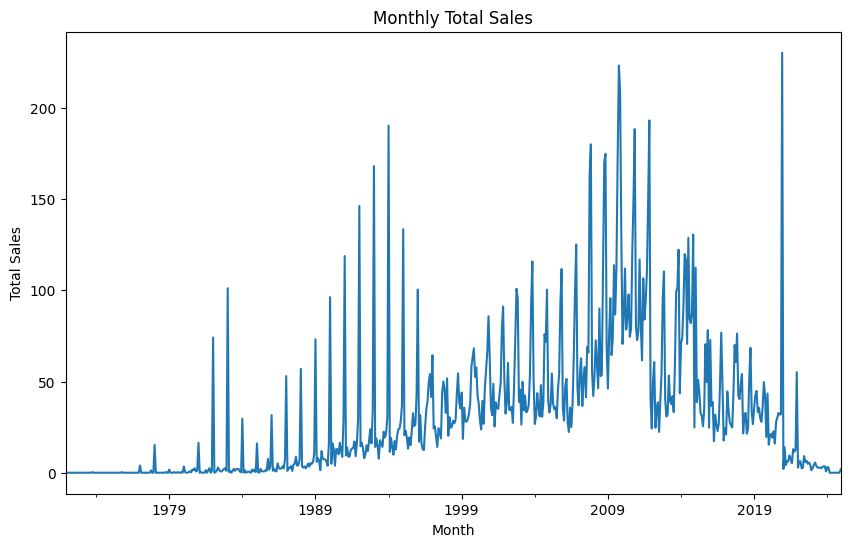

<ipython-input-29-9319205ca970>:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_critic_score = data['critic_score'].resample('Y').mean()


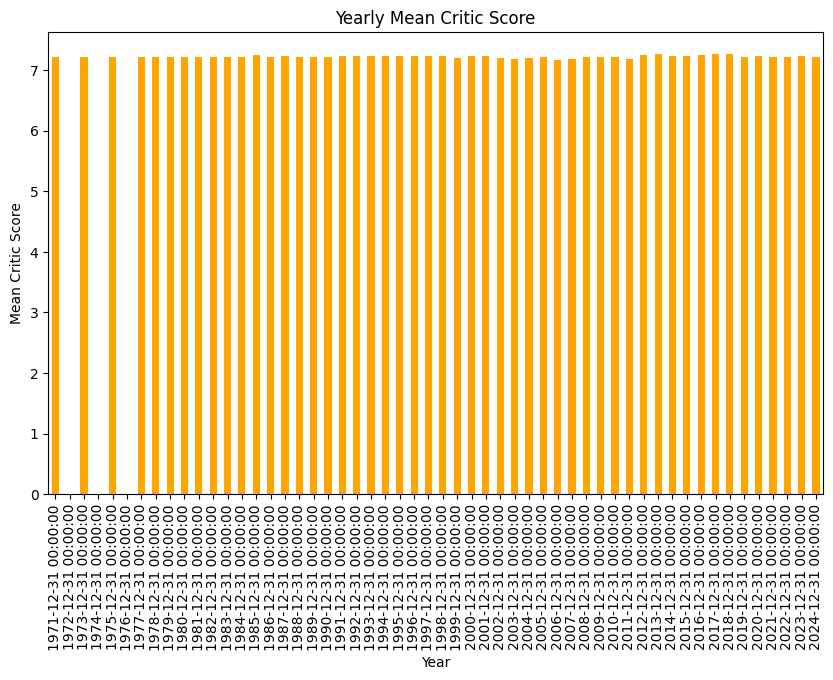

In [29]:
# Resample to calculate monthly total sales
monthly_sales = data['total_sales'].resample('M').sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# Resample to calculate yearly mean critic score
yearly_critic_score = data['critic_score'].resample('Y').mean()

plt.figure(figsize=(10, 6))
yearly_critic_score.plot(kind='bar', color='orange')
plt.title("Yearly Mean Critic Score")
plt.xlabel("Year")
plt.ylabel("Mean Critic Score")
plt.show()


# ***Module 4***

### ***Statistical Summary Measures***

In [30]:
# Summary statistics for numerical columns
print("Statistical Summary:")
print(data.describe())

# Specific statistics for total sales
print("\nTotal Sales Statistics:")
print(f"Mean: {data['total_sales'].mean()}")
print(f"Median: {data['total_sales'].median()}")
print(f"Standard Deviation: {data['total_sales'].std()}")

Statistical Summary:
       critic_score   total_sales      na_sales      jp_sales     pal_sales  \
count  64016.000000  64016.000000  64016.000000  64016.000000  64016.000000   
mean       7.220440      0.348912      0.216164      0.041108      0.082440   
std        0.470575      0.438995      0.225365      0.060399      0.184263   
min        1.000000      0.000000     -0.047128     -0.126605     -0.194495   
25%        7.220440      0.348912      0.210000      0.040000      0.081660   
50%        7.220440      0.348912      0.216164      0.041108      0.082440   
75%        7.220440      0.348912      0.216164      0.041108      0.082440   
max       10.000000     20.320000      9.760000      2.130000      9.850000   

        other_sales  total_sales_rolling          year  
count  64016.000000         64005.000000  56965.000000  
mean       0.013082             0.347515   2006.359572  
std        0.069871             0.411144      8.617813  
min       -0.126408             0.00000

### ***Data Elaboration***

In [33]:
# Shape of the dataset
print(f"Dataset Shape: {data.shape}")

# Checking the unique values in categorical columns
for col in categorical_columns:
  if col != "release_date":
    print(f"Unique values in '{col}':")
    print(data[col].unique())


Dataset Shape: (64016, 17)
Unique values in 'img':
['/games/boxart/full_6510540AmericaFrontccc.jpg'
 '/games/boxart/full_5563178AmericaFrontccc.jpg'
 '/games/boxart/827563ccc.jpg' ...
 '/games/boxart/full_8031506AmericaFrontccc.jpg'
 '/games/boxart/full_6553045AmericaFrontccc.jpg'
 '/games/boxart/full_6012940JapanFrontccc.png']
Unique values in 'title':
['Grand Theft Auto V' 'Grand Theft Auto: Vice City'
 'Call of Duty: Black Ops 3' ... 'Yoru, Tomosu'
 'Yunohana SpRING! ~Mellow Times~' 'Yurukill: The Calumniation Games']
Unique values in 'console':
['PS3' 'PS4' 'PS2' 'X360' 'XOne' 'PC' 'PSP' 'Wii' 'PS' 'DS' '2600' 'GBA'
 'NES' 'XB' 'PSN' 'GEN' 'PSV' 'DC' 'N64' 'SAT' 'SNES' 'GBC' 'GC' 'NS'
 '3DS' 'GB' 'WiiU' 'WS' 'VC' 'NG' 'WW' 'SCD' 'PCE' 'XBL' '3DO' 'GG' 'OSX'
 'Mob' 'PCFX' 'Series' 'All' 'iOS' '5200' 'And' 'DSiW' 'Lynx' 'Linux' 'MS'
 'ZXS' 'ACPC' 'Amig' '7800' 'DSi' 'AJ' 'WinP' 'iQue' 'GIZ' 'VB' 'Ouya'
 'NGage' 'AST' 'MSD' 'S32X' 'XS' 'PS5' 'Int' 'CV' 'Arc' 'C64' 'FDS' 'MSX'
 'OR' 'C

### ***1-D Statistical Data Analysis***

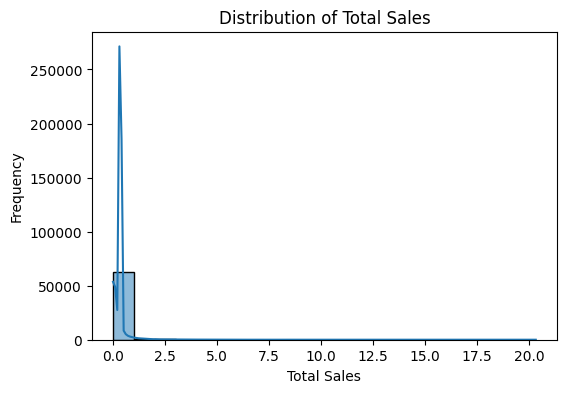

In [34]:
# Histogram for total sales
plt.figure(figsize=(6, 4))
sns.histplot(data['total_sales'], kde=True, bins=20)
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()


### ***2-D Statistical Data Analysis***

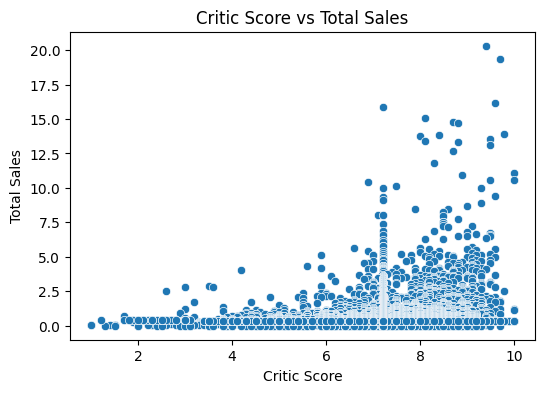

Correlation Matrix:
              critic_score  total_sales
critic_score      1.000000     0.160167
total_sales       0.160167     1.000000


In [35]:
# Scatter plot between critic score and total sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['critic_score'], y=data['total_sales'])
plt.title("Critic Score vs Total Sales")
plt.xlabel("Critic Score")
plt.ylabel("Total Sales")
plt.show()

# Correlation coefficient
correlation = data[['critic_score', 'total_sales']].corr()
print("Correlation Matrix:")
print(correlation)


### ***Contingency Tables***

In [36]:
# Contingency table for console and genre
contingency_table = pd.crosstab(data['console'], data['genre'])
print("Contingency Table:")
print(contingency_table)


Contingency Table:
genre    Action  Action-Adventure  Adventure  Board Game  Education  Fighting  \
console                                                                         
2600        302                 0          3           0          0         3   
3DO          12                 0         43           0          0        13   
3DS         198                34         63           0          1        18   
5200         26                 0          2           0          0         0   
7800         21                 0          0           0          0         3   
...         ...               ...        ...         ...        ...       ...   
XOne        309               211        216           2          1        91   
XS           63               121         94           1          0        18   
ZXS           5                 0          0           0          0         0   
iOS          20                14         16           0          0         0   
iQue     

### ***n-D Statistical Data Analysis***

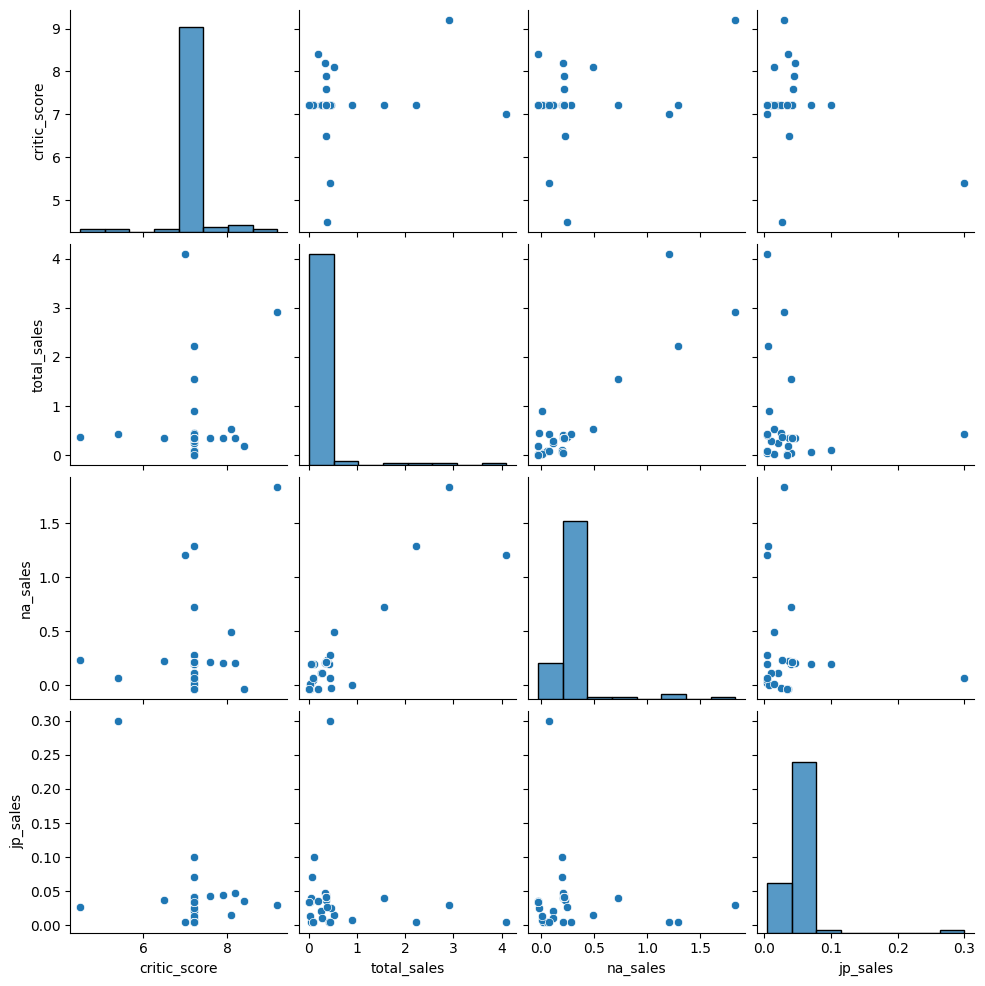

In [39]:
# Pairplot for selected columns
sns.pairplot(data[['critic_score', 'total_sales', 'na_sales', 'jp_sales']].dropna().sample(n=100, random_state=42))
plt.show()


### ***Visualization***

***Scatter Plots***

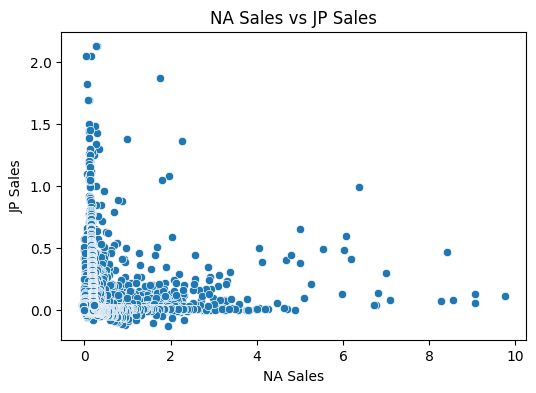

In [40]:
# Scatter plot between JP and NA sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['na_sales'], y=data['jp_sales'])
plt.title("NA Sales vs JP Sales")
plt.xlabel("NA Sales")
plt.ylabel("JP Sales")
plt.show()

***Dot Charts***

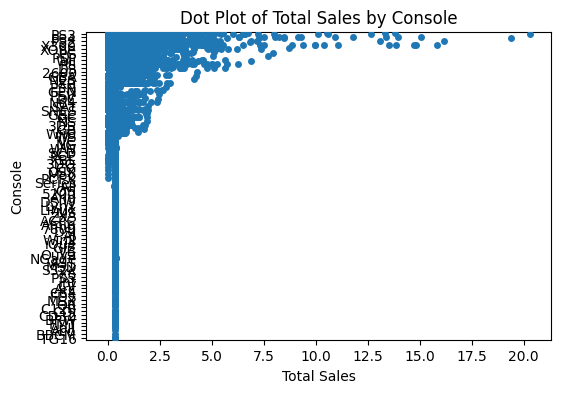

In [41]:
# Dot plot for total sales by console
plt.figure(figsize=(6, 4))
sns.stripplot(x=data['total_sales'], y=data['console'], jitter=True)
plt.title("Dot Plot of Total Sales by Console")
plt.xlabel("Total Sales")
plt.ylabel("Console")
plt.show()

***Bar Plots***

<ipython-input-42-75061935d856>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.values, y=genre_sales.index, palette="viridis")


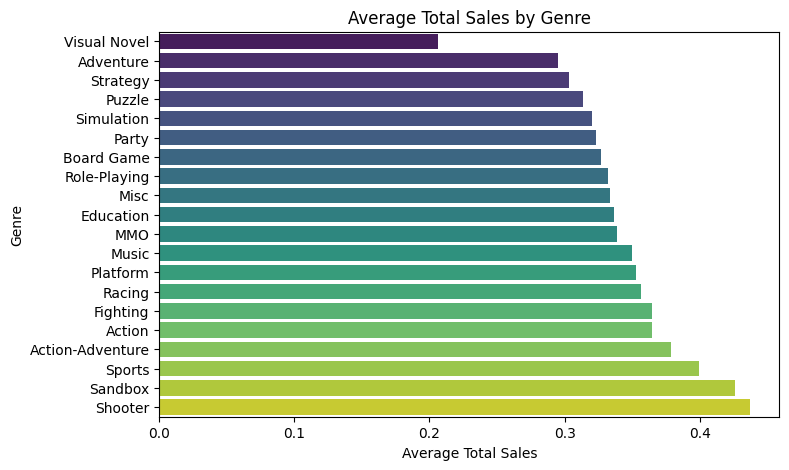

In [42]:
# Bar plot for average total sales by genre
genre_sales = data.groupby('genre')['total_sales'].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette="viridis")
plt.title("Average Total Sales by Genre")
plt.xlabel("Average Total Sales")
plt.ylabel("Genre")
plt.show()

# ***Module 5***

### ***Introduction to Spectral Clustering***

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


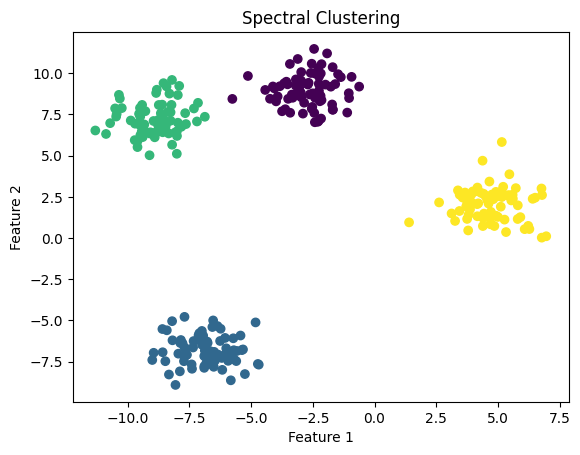

In [43]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### ***Document Clustering***

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Sample documents
documents = [
    "I love programming in Python",
    "Python is great for data science",
    "Data science is the future of AI",
    "AI and machine learning are the future",
    "Java is popular for web development",
    "I enjoy coding in Java"
]

# Convert text data into TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Show the results
for i, doc in enumerate(documents):
    print(f"Document {i+1}: {doc} -> Cluster {labels[i]}")


Document 1: I love programming in Python -> Cluster 0
Document 2: Python is great for data science -> Cluster 0
Document 3: Data science is the future of AI -> Cluster 0
Document 4: AI and machine learning are the future -> Cluster 0
Document 5: Java is popular for web development -> Cluster 1
Document 6: I enjoy coding in Java -> Cluster 1


### ***Minimum Spanning Tree (MST) Clustering***

In [45]:
import networkx as nx
import numpy as np

# Generate a sample data set
X = np.random.rand(10, 2)  # 10 data points, 2 features

# Calculate the distance matrix
from sklearn.metrics.pairwise import pairwise_distances
dist_matrix = pairwise_distances(X)

# Create a graph
G = nx.Graph()

# Add edges based on distance matrix
for i in range(len(X)):
    for j in range(i+1, len(X)):
        G.add_edge(i, j, weight=dist_matrix[i, j])

# Apply Minimum Spanning Tree algorithm
mst = nx.minimum_spanning_tree(G)

# Extract the edges of the MST
edges = list(mst.edges())
print("Edges of Minimum Spanning Tree:", edges)


Edges of Minimum Spanning Tree: [(0, 9), (0, 3), (0, 6), (1, 3), (2, 5), (2, 6), (4, 8), (5, 8), (5, 7)]


### ***Overview of Model-based Clustering***

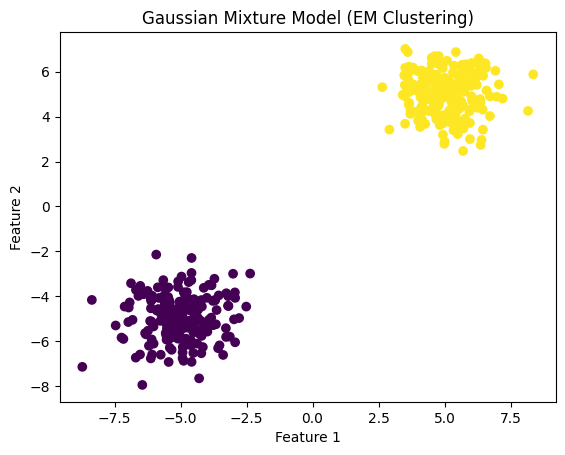

In [46]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data from two normal distributions
X = np.concatenate([np.random.normal(loc=-5, scale=1, size=(200, 2)),
                   np.random.normal(loc=5, scale=1, size=(200, 2))])

# Fit a Gaussian Mixture Model (EM algorithm)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# Predict the labels (clusters)
labels = gmm.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Gaussian Mixture Model (EM Clustering)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### ***Hierarchical Agglomerative Model-based Clustering***

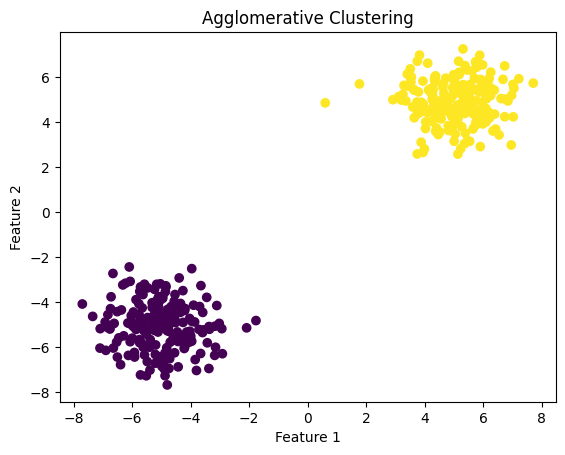

In [47]:
from sklearn.cluster import AgglomerativeClustering

# Use the same synthetic data
X = np.concatenate([np.random.normal(loc=-5, scale=1, size=(200, 2)),
                   np.random.normal(loc=5, scale=1, size=(200, 2))])

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### ***Outlier Detection Using Clustering***

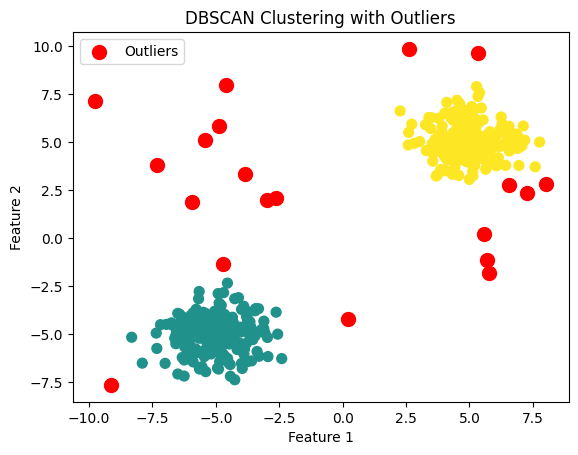

In [48]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with noise
X = np.concatenate([np.random.normal(loc=-5, scale=1, size=(200, 2)),
                   np.random.normal(loc=5, scale=1, size=(200, 2))])
X = np.concatenate([X, np.random.uniform(low=-10, high=10, size=(20, 2))])  # Add noise

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify outliers (label = -1 means outlier)
outliers = X[labels == -1]

# Plot the data points, color outliers in red
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', s=100)
plt.title('DBSCAN Clustering with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# ***Module 6***

### ***Linear Methods***

***Principal Component Analysis (PCA)***

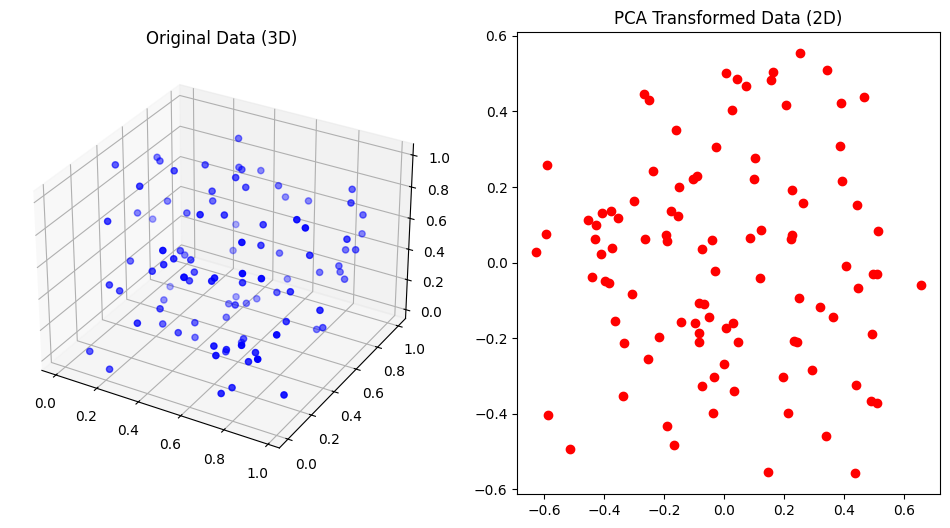

In [49]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (e.g., 3D data)
X = np.random.rand(100, 3)

# Apply PCA (reduce to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the original data in 3D and PCA transformed data in 2D
fig = plt.figure(figsize=(12, 6))

# 3D plot for original data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], color='b')
ax1.set_title('Original Data (3D)')

# 2D plot for PCA transformed data
ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], color='r')
ax2.set_title('PCA Transformed Data (2D)')

plt.show()

***Singular Value Decomposition (SVD)***

In [50]:
from sklearn.decomposition import TruncatedSVD

# Generate synthetic data (e.g., matrix)
X = np.random.rand(10, 5)

# Apply Truncated SVD (equivalent to PCA for dense matrices)
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

print("SVD components:")
print(svd.components_)

SVD components:
[[ 0.50980984  0.43283664  0.52935278  0.39309401  0.34352454]
 [-0.00358495 -0.62592472 -0.13482951  0.23686446  0.73069941]]


***Factor Analysis***

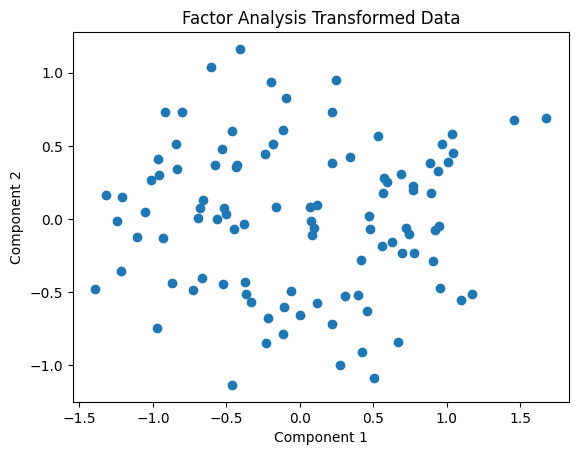

In [51]:
from sklearn.decomposition import FactorAnalysis

# Generate synthetic data
X = np.random.rand(100, 5)

# Apply Factor Analysis (reduce to 2 components)
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

# Plot the transformed data
plt.scatter(X_fa[:, 0], X_fa[:, 1])
plt.title('Factor Analysis Transformed Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

***Intrinsic Dimensionality***

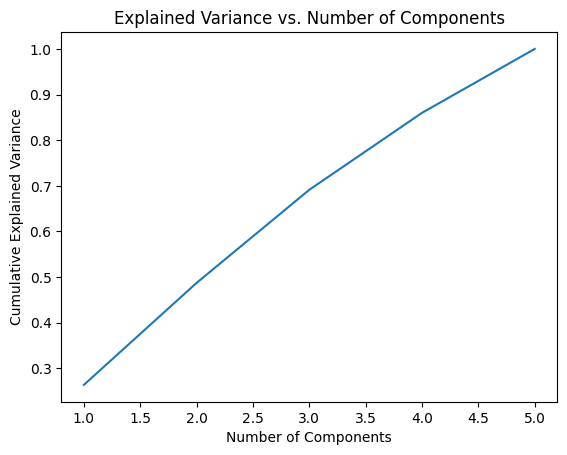

In [53]:
from sklearn.decomposition import PCA

# Generate synthetic data (e.g., 100 points in 5 dimensions)
X = np.random.rand(100, 5)

# Apply PCA to estimate the number of components (dimensionality)
pca = PCA()
pca.fit(X)

# Plot the explained variance ratio to assess intrinsic dimensionality
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### ***Nonlinear Methods***

***Multidimensional Scaling (MDS)***

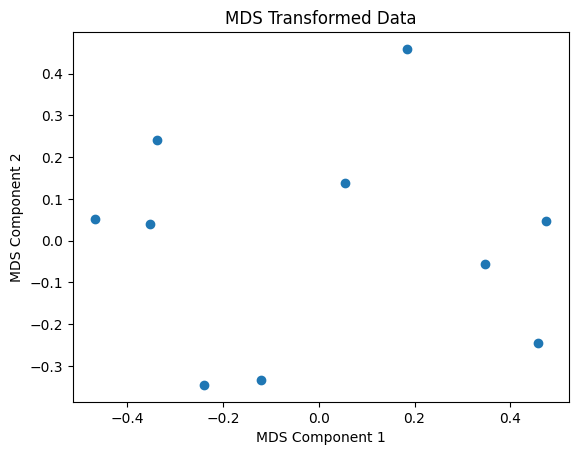

In [55]:
from sklearn.manifold import MDS
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic distance matrix (e.g., pairwise Euclidean distances)
X = np.random.rand(10, 3)
dist_matrix = np.linalg.norm(X[:, np.newaxis] - X, axis=-1)

# Apply MDS to reduce dimensionality (to 2D)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
X_mds = mds.fit_transform(dist_matrix)

# Plot MDS result
plt.scatter(X_mds[:, 0], X_mds[:, 1])
plt.title('MDS Transformed Data')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.show()

***Manifold Learning***

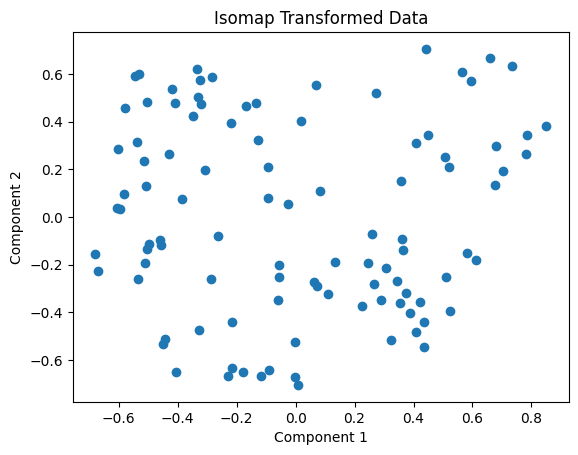

In [57]:
from sklearn.manifold import Isomap
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (e.g., 3D data)
X = np.random.rand(100, 3)

# Apply Isomap to reduce to 2 dimensions
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

# Plot the result
plt.scatter(X_isomap[:, 0], X_isomap[:, 1])
plt.title('Isomap Transformed Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

***Self-Organizing Maps (SOM)***

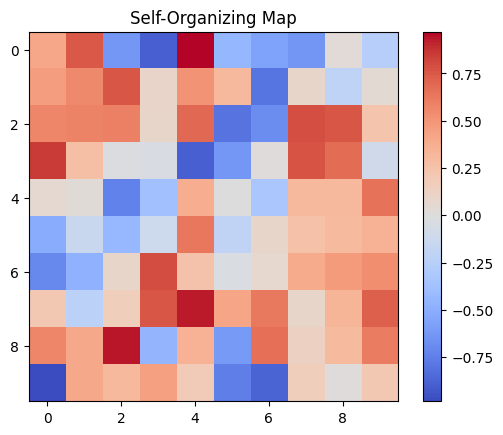

In [60]:
#!pip3 install minisom
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.random.rand(100, 3)

# Apply SOM
som = MiniSom(10, 10, 3, sigma=1.0, learning_rate=0.5)
som.train(X, 100)

# Plot the SOM weight vectors (mapping of data points to the grid)
plt.imshow(som.get_weights()[:, :, 0], cmap='coolwarm')  # Use the first feature for coloring
plt.title('Self-Organizing Map')
plt.colorbar()
plt.show()

# ***Module 7***

### ***Constructing a Linear Regression Model***

Mean Absolute Error: 0.5913425779189774
R² Score: 0.7319688989767404


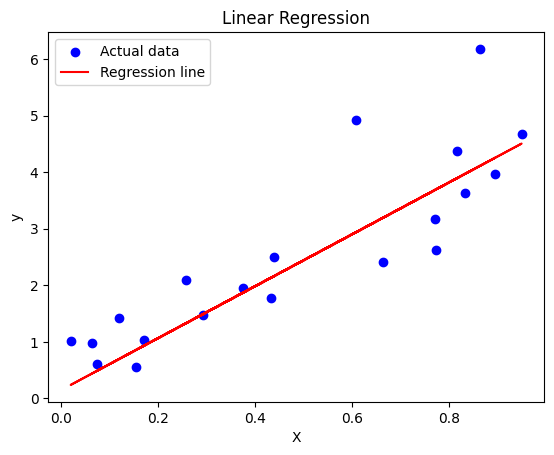

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Generate some synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)  # 100 random data points for X
y = 5 * X + np.random.randn(100, 1)  # Linear relationship with some noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Evaluate the model using MAE and R2 score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Plot the data and the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

### ***Understanding Reinforcement Learning (RL)***

***Simple Q-learning Example for Reinforcement Learning***

In [63]:
import numpy as np
import random

# Environment setup: a simple 4-state, 2-action problem
states = [0, 1, 2, 3]
actions = [0, 1]  # Action 0: left, Action 1: right

# Reward function: rewards based on state
rewards = [-1, -1, 10, 0]  # rewards for each state (last state is terminal with reward 10)

# Q-table initialization (4 states, 2 actions)
Q = np.zeros((len(states), len(actions)))

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

# Training loop for Q-learning
for episode in range(1000):
    state = random.choice(states)  # start from a random state

    while state != 3:  # until reaching terminal state (state 3)
        if random.uniform(0, 1) < epsilon:  # Exploration: Choose a random action
            action = random.choice(actions)
        else:  # Exploitation: Choose the action with the highest Q-value
            action = np.argmax(Q[state, :])

        # Simulate environment response: Next state and reward
        next_state = state + 1 if action == 1 else state - 1
        next_state = max(0, min(next_state, 3))  # Ensure next_state is within bounds
        reward = rewards[next_state]

        # Update Q-value using Q-learning formula
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state  # Move to the next state

# Print learned Q-values (only for the first time)
print("Q-table after training:")
print(Q)

# Simulate a test episode (choose actions based on learned Q-values)
state = 0  # start from state 0
print("\nTest Episode (State -> Action):")
test_episode_steps = 5  # limit the steps in the test episode for brevity
step = 0
while state != 3 and step < test_episode_steps:
    action = np.argmax(Q[state, :])  # Choose the best action
    print(f"At state {state}, take action {action}")
    state = state + 1 if action == 1 else state - 1
    step += 1


Q-table after training:
[[36.75517214 42.10526316]
 [36.89473684 47.89473684]
 [42.10526316  0.        ]
 [ 0.          0.        ]]

Test Episode (State -> Action):
At state 0, take action 1
At state 1, take action 1
At state 2, take action 0
At state 1, take action 1
At state 2, take action 0
